# Распознавание человека по лицу с использованием библиотеки [dlib](http://dlib.net/).


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (Файл -> Сохранить копию на Диске). Свою копию вы сможете изменять и запускать.

Учебный курс "Быстрый старт в искусственный интеллект" для учителей школ.



Подключаем необходимые библиотеки

In [55]:
import dlib
import cv2
import matplotlib.pyplot as plt
from skimage import io
from scipy.spatial import distance
%matplotlib inline

## Загружаем предварительно обученные сети

Сеть для выделения 5 ключевых точек на лице

In [56]:
!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2 -O shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_5_face_landmarks.dat.bz2

--2022-08-01 11:03:44--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Распознаётся dlib.net (dlib.net)… 107.180.26.78
Подключение к dlib.net (dlib.net)|107.180.26.78|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 5706710 (5,4M)
Сохранение в: «shape_predictor_5_face_landmarks.dat.bz2»

shape_predictor_5_f 100%[===================>]   5,44M  2,51MB/s    за 2,2s    

2022-08-01 11:03:46 (2,51 MB/s) - «shape_predictor_5_face_landmarks.dat.bz2» сохранён [5706710/5706710]

bzip2: Output file shape_predictor_5_face_landmarks.dat already exists.


Сеть для распознавания лица

In [57]:
!wget http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2 -O dlib_face_recognition_resnet_model_v1.dat.bz2
!bzip2 -d dlib_face_recognition_resnet_model_v1.dat.bz2

--2022-08-01 11:03:54--  http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
Распознаётся dlib.net (dlib.net)… 107.180.26.78
Подключение к dlib.net (dlib.net)|107.180.26.78|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 21428389 (20M)
Сохранение в: «dlib_face_recognition_resnet_model_v1.dat.bz2»

dlib_face_recogniti 100%[===================>]  20,44M  2,49MB/s    за 7,0s    

2022-08-01 11:04:01 (2,92 MB/s) - «dlib_face_recognition_resnet_model_v1.dat.bz2» сохранён [21428389/21428389]

bzip2: Output file dlib_face_recognition_resnet_model_v1.dat already exists.


## Создаем объекты для поиска и распознавания лица

In [59]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')


## Загружаем демонстрационные фотографии

Замените ссылки и имена файлов на фотографии, которые вы хотите обработать

In [60]:
# Первое фото
photo1_download_link = 'https://github.com/sozykin/dlpython_course/raw/master/computer_vision/foto_comparison/sozykin_passport.jpg'
photo1_file_name = 'sozykin_passport.jpg'
# Второе фото
photo2_download_link = 'https://github.com/sozykin/dlpython_course/raw/master/computer_vision/foto_comparison/sozykin_webcam.jpg'
photo2_file_name = 'sozykin_webcam.jpg'

In [61]:
!wget $photo1_download_link
!wget $photo2_download_link

--2022-08-01 11:04:50--  https://github.com/sozykin/dlpython_course/raw/master/computer_vision/foto_comparison/sozykin_passport.jpg
Распознаётся github.com (github.com)… 140.82.121.3
Подключение к github.com (github.com)|140.82.121.3|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://raw.githubusercontent.com/sozykin/dlpython_course/master/computer_vision/foto_comparison/sozykin_passport.jpg [переход]
--2022-08-01 11:04:51--  https://raw.githubusercontent.com/sozykin/dlpython_course/master/computer_vision/foto_comparison/sozykin_passport.jpg
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 60808 (59K) [image/jpeg]
Сохранение в: «sozykin_passport.jpg.2»

sozykin_passport.jp 100%[=======

Проверяем, что фотографии загружены

In [ ]:
!ls

## Показываем загруженные фотографии

In [62]:
photo1 = io.imread(photo1_file_name)
photo2 = io.imread(photo2_file_name)

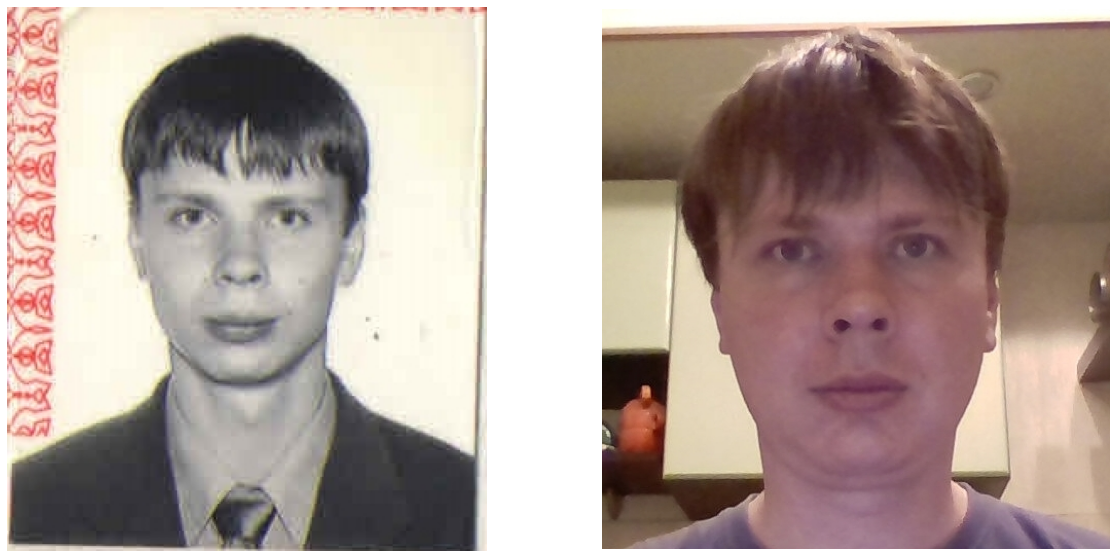

In [63]:
plt.figure(figsize = (20,10))
plt.subplot(121); plt.imshow(photo1); plt.axis('off');
plt.subplot(122); plt.imshow(photo2); plt.axis('off');
plt.show()

## Ищем лица на фотографиях

Определяем лица

In [64]:
dets1 = detector(photo1, 1)
dets2 = detector(photo2, 1)

In [65]:
if len(dets1) < 1:
  print('Error! No faces were found on the first photo')
else:
  fb1 = dets1[0]  

In [66]:
if len(dets2) < 1:
  print('Error! No faces were found on the second photo')
else:
  fb2 = dets2[0] 

Рисуем прямоугольники вокруг лиц

In [67]:
# Create copy of original photos
photo1_display = photo1.copy()
photo2_display = photo2.copy()
# Draw rectangles using OpenCV
photo1_display = cv2.rectangle(photo1_display, (fb1.left(), fb1.top()), (fb1.right(),fb1.bottom()), (255,0,0), 2)
photo2_display = cv2.rectangle(photo2_display, (fb2.left(), fb2.top()), (fb2.right(),fb2.bottom()), (255,0,0), 2)

Показываем найденные лица

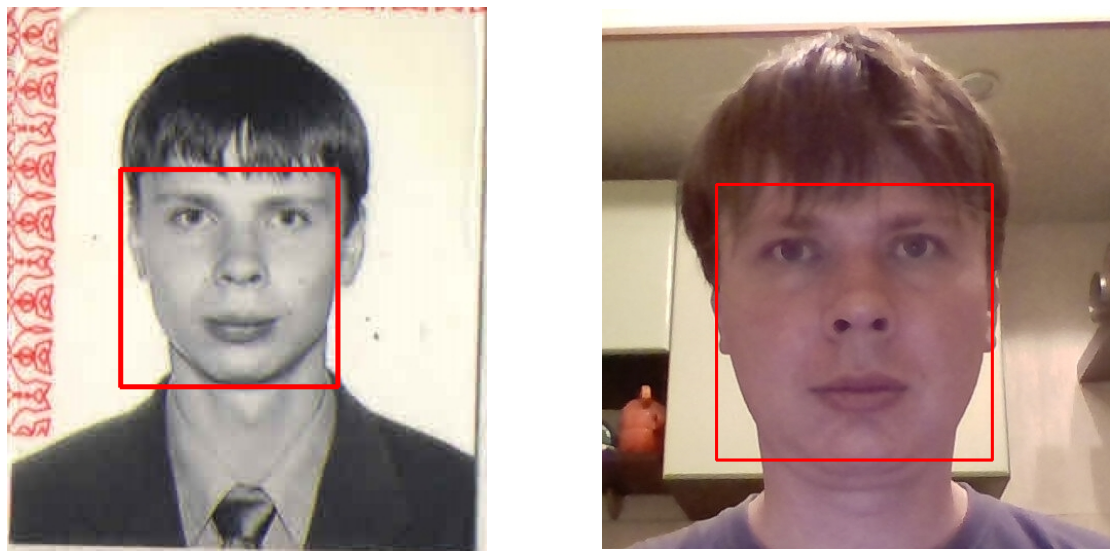

In [68]:
plt.figure(figsize = (20,10))
plt.subplot(121); plt.imshow(photo1_display); plt.axis('off');
plt.subplot(122); plt.imshow(photo2_display); plt.axis('off');
plt.show()

## Ищем ключевые точки лиц

Ищем ключевые точки с помощью предварительно обученной модели

In [69]:
shape1 = sp(photo1, fb1)
shape2 = sp(photo2, fb2)

Рисуем ключевые точки на фото

In [70]:
for i in range(0, 5):
    cv2.circle(photo1_display, (shape1.part(i).x, shape1.part(i).y), 2, (0,255,0), -1)
    cv2.circle(photo2_display, (shape2.part(i).x, shape2.part(i).y), 2, (0,255,0), -1)

Показываме фото с ключевыми точками

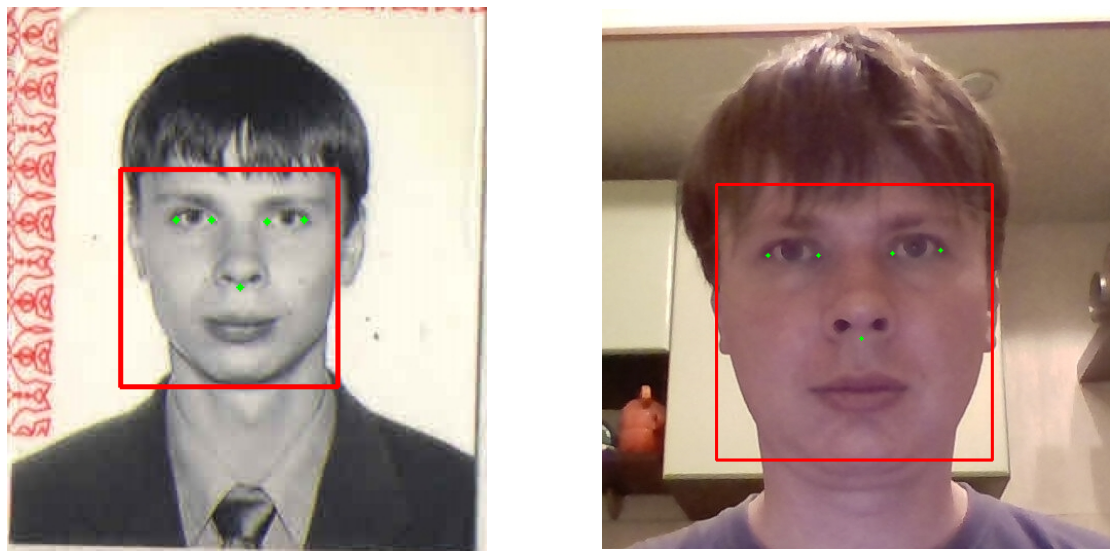

In [71]:
plt.figure(figsize = (20,10))
plt.subplot(121); plt.imshow(photo1_display); plt.axis('off');
plt.subplot(122); plt.imshow(photo2_display); plt.axis('off');
plt.show()

## Извлекаем дескрипторы из лиц

Дескриптор - это вектор числе, соответствующий изображению, создаваемый с помощью предварительно обученной нейронной сети. Дескрипторы из фотографий одного человека похожи друг на друга. 




In [72]:
face_descriptor1 = facerec.compute_face_descriptor(photo1, shape1)
face_descriptor2 = facerec.compute_face_descriptor(photo2, shape2)

Предварительно обученная сеть создает дексрипторы размером 128 чисел

In [73]:
print("The size of the first descriptor: ", len(face_descriptor1))
print("First 15 elements of the first descriptor: ", face_descriptor1[0:15])

The size of the first descriptor:  128
First 15 elements of the first descriptor:  -0.135058
0.0127334
-0.0113762
-0.0832928
-0.0770529
0.0443171
-0.0652824
-0.122014
0.148777
-0.0873931
0.24765
-0.0370662
-0.30003
-0.0595513
0.0251639


In [74]:
print("The size of the second descriptor: ", len(face_descriptor2))
print("First 15 elements of the second descriptor: ", face_descriptor2[0:15])

The size of the second descriptor:  128
First 15 elements of the second descriptor:  -0.127228
0.0239796
-0.0490802
-0.0672531
-0.079252
0.00449674
-0.0250777
-0.146233
0.187767
-0.0697903
0.231244
-0.0701707
-0.25562
-0.0336363
-0.0224817


## Сравнение дескрипторов

Чтобы сравнивать лица, нам необходим метод сравнения дексрипторов, извлеченных из фотографи. Разработчики библиотеки `dlib` используют для сравнения Евклидово расстояние. [Если Евклидово расстояние между двумя векторами, извлеченными из фотографий, меньше, чем 0.6, то фотографии принадлежат одному человеку](http://dlib.net/face_recognition.py.html).

In [75]:
d = distance.euclidean(face_descriptor1, face_descriptor2)

In [76]:
print("Евклидово расстояние между векторами:", d)

Евклидово расстояние между векторами: 0.3854173168469901


In [77]:
threshold = 0.6

In [78]:
if d < threshold:
    print("На фотографиях один человек")
else:
    print("На фотографиях разные люди")

На фотографиях один человек
